In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.datasets import fetch_california_housing

In [2]:
housing = fetch_california_housing()
df = pd.DataFrame(housing.data, columns = housing.feature_names)
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [3]:
df['MedHouseVal'] = housing.target
X = df[['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']].values
y = df['MedHouseVal'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [4]:
# Applying Polynomial transformation

poly = PolynomialFeatures(degree = 2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [5]:
model = LinearRegression()
model.fit(X_train_poly, y_train)
y_pred = model.predict(X_test_poly)

df_actual_pred = pd.DataFrame({'y_test' : y_test, 'y_pred' : y_pred})
df_actual_pred.head()

,y_test,y_pred
0,0.47700,0.553997
1,0.45800,1.751186
2,5.00001,3.492379
3,2.18600,2.849669
4,2.78000,2.762426


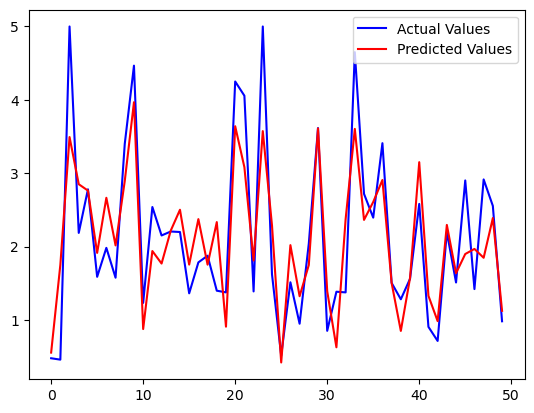

In [22]:
plt.plot(df_actual_pred[:50]['y_test'], color = 'blue', label = 'Actual Values')
plt.plot(df_actual_pred[:50]['y_pred'], color = 'red', label = 'Predicted Values')
plt.legend()
plt.show()

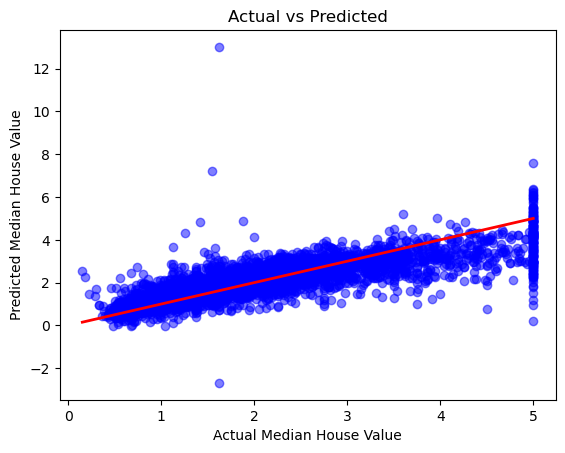

In [7]:
plt.scatter(y_test, y_pred, color = 'blue', alpha = 0.5) # scatter plot for predicted value vs actual value
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color = 'red', linewidth = 2) # red line
plt.xlabel('Actual Median House Value')
plt.ylabel('Predicted Median House Value')
plt.title('Actual vs Predicted')
plt.show()

In [8]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
print()

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)
print()

r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

Mean Squared Error: 0.46430151024653377

Mean Absolute Error: 0.4670009330320555

R-squared: 0.6456819832921057


In [10]:
X_1 = df[['MedInc']].values
y_1 = df['MedHouseVal'].values

X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, y_1, test_size = 0.2, random_state = 42)

poly = PolynomialFeatures(degree = 2)
X_train_poly_1 = poly.fit_transform(X_train_1)
X_test_poly_1 = poly.transform(X_test_1)

In [16]:
model_1 = LinearRegression()
model_1.fit(X_train_poly_1, y_train_1)
y_pred_1 = model_1.predict(X_test_poly_1)

In [17]:
X_fit = np.linspace(X_1.min(), X_1.max(), 100).reshape(-1, 1)
X_fit_poly = poly.transform(X_fit)
y_fit_pred = model_1.predict(X_fit_poly)

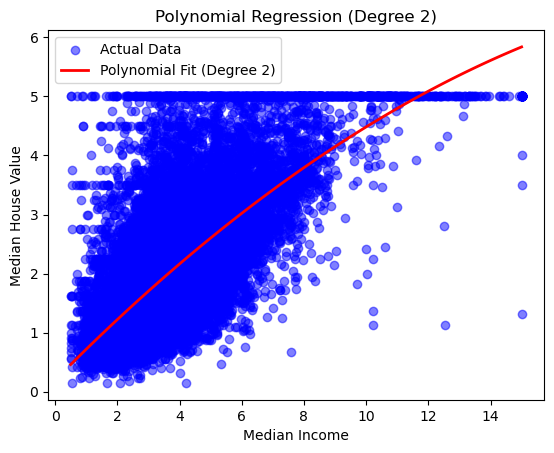

In [19]:
plt.scatter(X_1, y_1, color = 'blue', alpha = 0.5, label = 'Actual Data')
plt.plot(X_fit, y_fit_pred, color = 'red', linewidth = 2, label='Polynomial Fit (Degree 2)')
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.title('Polynomial Regression (Degree 2)')
plt.legend()
plt.show()

In [24]:
poly_mse = mean_squared_error(y_test_1, y_pred_1)
print("Mean Squared Error for Polynomial Regression:", poly_mse)
print()

poly_mae = mean_absolute_error(y_test, y_pred_1)
print("Mean Absolute Error Polynomial Regression:", poly_mae)
print()

poly_r2 = r2_score(y_test, y_pred_1)
print("R-squared Polynomial Regression:", poly_r2)

Mean Squared Error for Polynomial Regression: 0.7032732680932144

Mean Absolute Error Polynomial Regression: 0.6282915588701903

R-squared Polynomial Regression: 0.46331772769346224
